In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path="G:\ds&ai\Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# Steps in Outlier analysis

### Step - 1: Find Q1,Q2,Q3

In [3]:
# np.percentile(column data,quartile)

q1=round(np.percentile(visa_df['prevailing_wage'],25),3)
q2=round(np.percentile(visa_df['prevailing_wage'],50),3)
q3=round(np.percentile(visa_df['prevailing_wage'],75),3)

print(q1,q2,q3)

34015.48 70308.21 107735.513


### Step - 2: Find IQR

In [4]:
# IQR=Q3-Q1

iqr=q3-q1
print(iqr)

73720.033


### Step - 3: Calculate lower bound and upper bound

In [5]:
# lower bound = Q1- 1.5(IQR)
# upper bound = Q1+ 1.5(IQR)

lower_bound = round(q1-(1.5*iqr),3)
upper_bound = round(q3+(1.5*iqr),3)

print(lower_bound,upper_bound)

-76564.569 218315.562


### Step - 4: Find the outliers

In [6]:
# condition = (column data < lower bound) or (column data > upper bound)
# main data[condition]

condition_1= (visa_df['prevailing_wage'] < lower_bound) | (visa_df['prevailing_wage'] > upper_bound)
outliers_df=visa_df[condition_1]
outliers_df

# these 427 rows are the outliers of the data wrt. the column prevailing_wage

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


### Non outliers data

In [7]:
condition_2= (visa_df['prevailing_wage'] > lower_bound) & (visa_df['prevailing_wage'] < upper_bound)
non_outliers_df=visa_df[condition_2]
non_outliers_df

# 25053 rows are non outliers

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


#### Comparing original data and non outliers data

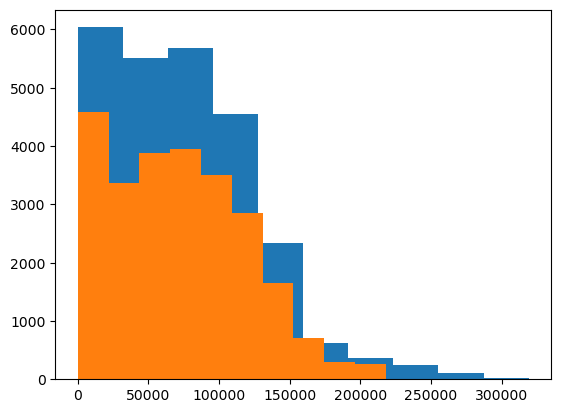

In [8]:
# 1st -> histogram analysis

plt.hist(visa_df['prevailing_wage'])                   # blue color
plt.hist(non_outliers_df['prevailing_wage'])           # orange color
plt.show()                                                 

# after removing the outliers the frequency of almost all intervals decreased and some became 0

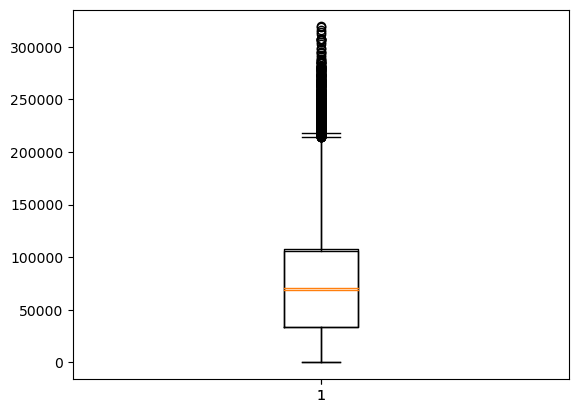

In [9]:
# 2nd -> box plot analysis

plt.boxplot(visa_df['prevailing_wage'])
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()

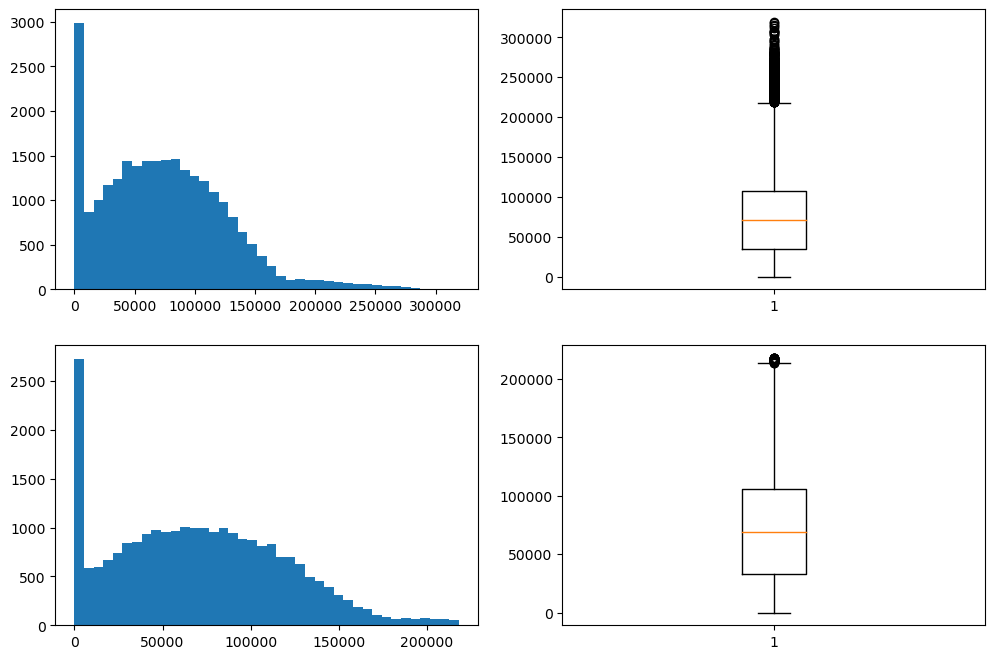

In [10]:
# above graph is overlapping 
# So, use subplots

plt.figure(figsize=(12,8))                                          # applies for all subplots 

plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df['prevailing_wage'])

plt.show()

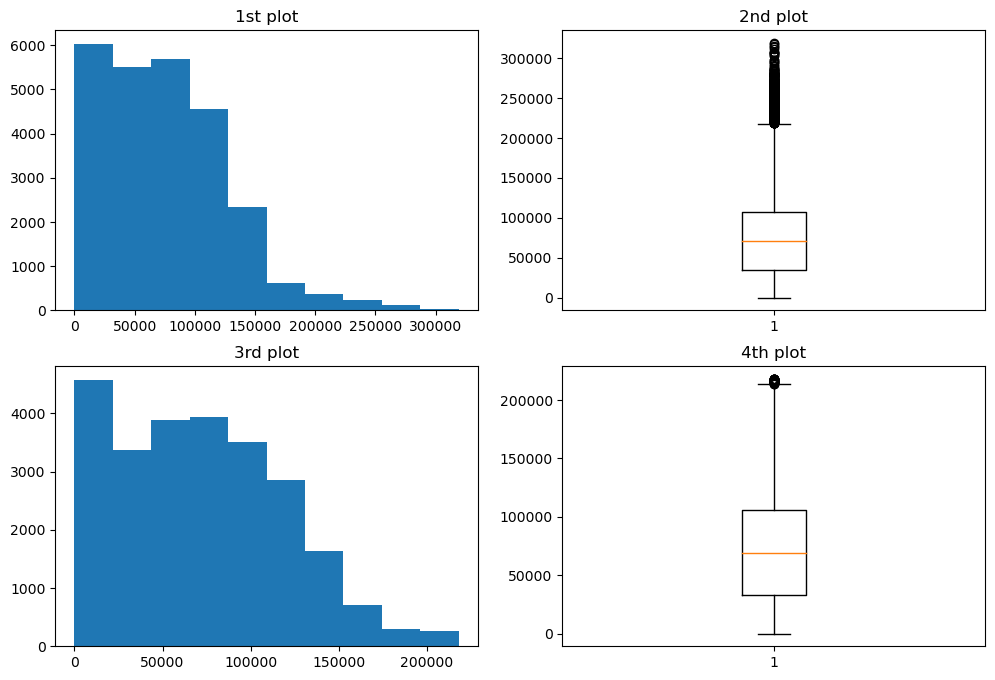

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1).hist(visa_df['prevailing_wage'])
plt.title('1st plot')

plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.title('2nd plot')

plt.subplot(2,2,3).hist(non_outliers_df['prevailing_wage'])
plt.title('3rd plot')

plt.subplot(2,2,4).boxplot(non_outliers_df['prevailing_wage'])
plt.title('4th plot')

plt.show()

## How to deal Outliers

In [12]:
# 1) Drop the outlies if its percentage < 2% (but not recommended b/c data loss)
# 2) impute with median value (good practice, median is not effected with outliers)
# 3) Cap with Q1 or Q3 values (outliers less than lowerbound replace with Q1, more than upperbound replace with Q3)

### 1) Dropping the outliers

### 2) Impute with median value

In [27]:
# Q3. Read the each observation from prevailing wage
#     if observation <lb or >ub : fill with median value
#     else keep as it is

new_list=[]

median=visa_df['prevailing_wage'].median()
q1=np.percentile(visa_df['prevailing_wage'],25)
q2=np.percentile(visa_df['prevailing_wage'],50)
q3=np.percentile(visa_df['prevailing_wage'],75)

iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)

for i in visa_df['prevailing_wage']:
    if ((i<lb)|(i>ub)):
        new_list.append(median)
    else:
        new_list.append(i)
        
len(new_list)
visa_df['prevailing_wage_new']=new_list

,new_prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,70308.2100
25477,146298.8500
25478,86154.7700


### 3) Capping with Q1 or Q3